In [ ]:
# This tests algorithms to remove cosmic rays from multiepoch spectra (in particular from SDSS stripe 82
# spectra, which are too many for manual removal)

# Created 2021 May 10 by E.S.

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

%matplotlib inline

In [2]:
file_list = glob.glob("/Users/bandari/Documents/git.repos/rrlyrae_metallicity/" +\
                      "notebooks_for_development/data/sdss_stripe_82_data/input/" + "*")

In [3]:
# find all parent names (i.e., one name for each target, whether or not multiepoch observations were made)

parent_list = list(set([i.split("g00")[0] for i in file_list]))

In [ ]:
# initialize list to hold single-epoch spectra names
## TBD

In [50]:
def plot_result(spec0, spec1):
    
    # remove from consideration the regions around the absorption lines, which change with time and can 
    # be misidentified as a cosmic ray hit (a spectrum with an actual hit will have to be discarded manually)
    spec0_flux_copy = spec0["flux"].to_numpy()
    spec1_flux_copy = spec1["flux"].to_numpy()
    half_width = 20
    cond_1 = np.logical_and(spec0["wavel"] > 3933.66-half_width, spec0["wavel"] < 3933.66+half_width)
    cond_2 = np.logical_and(spec0["wavel"] > 3970.075-half_width, spec0["wavel"] < 3970.075+half_width)
    cond_3 = np.logical_and(spec0["wavel"] > 4101.71-half_width, spec0["wavel"] < 4101.71+half_width)
    cond_4 = np.logical_and(spec0["wavel"] > 4340.472-half_width, spec0["wavel"] < 4340.472+half_width)
    cond_5 = np.logical_and(spec0["wavel"] > 4861.29-half_width, spec0["wavel"] < 4861.29+half_width)
    spec0_flux_copy[cond_1] = np.nan
    spec0_flux_copy[cond_2] = np.nan
    spec0_flux_copy[cond_3] = np.nan
    spec0_flux_copy[cond_4] = np.nan
    spec0_flux_copy[cond_5] = np.nan
    spec1_flux_copy[cond_1] = np.nan
    spec1_flux_copy[cond_2] = np.nan
    spec1_flux_copy[cond_3] = np.nan
    spec1_flux_copy[cond_4] = np.nan
    spec1_flux_copy[cond_5] = np.nan
    
    resids = np.subtract(spec0_flux_copy,spec1_flux_copy)
    
    # sigma clip
    # (note sigma lower is a large number, to keep track of which spectrum has the (+) cosmic ray)
    filtered_data = sigma_clip(resids, sigma_lower=50, sigma_upper=5, iters=1)
    
    # also remove points adjacent to those masked, by rolling spectra by two elements in each direction,
    # subtracting them and finding where difference is nan
    diff_roll_p1 = np.subtract(filtered_data,np.roll(filtered_data,1))
    diff_roll_p2 = np.subtract(filtered_data,np.roll(filtered_data,2))
    diff_roll_n1 = np.subtract(filtered_data,np.roll(filtered_data,-1))
    diff_roll_n2 = np.subtract(filtered_data,np.roll(filtered_data,-2))
    mark_bad_array = np.subtract(np.subtract(diff_roll_p1,diff_roll_p2),np.subtract(diff_roll_n1,diff_roll_n2))
    mask_bad_pre_line_restore = np.ma.getmask(mark_bad_array)
    
    masked_flux_0 = np.ma.masked_array(spec0["flux"], mask=mask_bad)
    masked_wavel_0 = np.ma.masked_array(spec0["wavel"], mask=mask_bad)
    masked_flux_1 = np.ma.masked_array(spec1["flux"], mask=mask_bad)
    masked_wavel_1 = np.ma.masked_array(spec1["wavel"], mask=mask_bad)

    num_removed = np.subtract(len(resids), np.isfinite(filtered_data).sum())
    
    plt.clf()
    fig = plt.figure(figsize=(24,9))
    plt.plot(df_single_0["wavel"],resids,color="red")
    #plt.plot(df_single_0["wavel"],df_single_0["flux"])
    plt.plot(df_single_0["wavel"],spec0_flux_copy)
    #plt.plot(df_single_1["wavel"],df_single_1["flux"])
    plt.plot(masked_wavel_0,masked_flux_0,color="k")
    #plt.title("pts removed: " + str(num_removed))
    #plt.show()
    string_rand = str(np.random.randint(low=0,high=10000))
    plt.savefig("junk_"+string_rand+".png")
    
    return

<Figure size 432x288 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

<Figure size 1728x648 with 0 Axes>

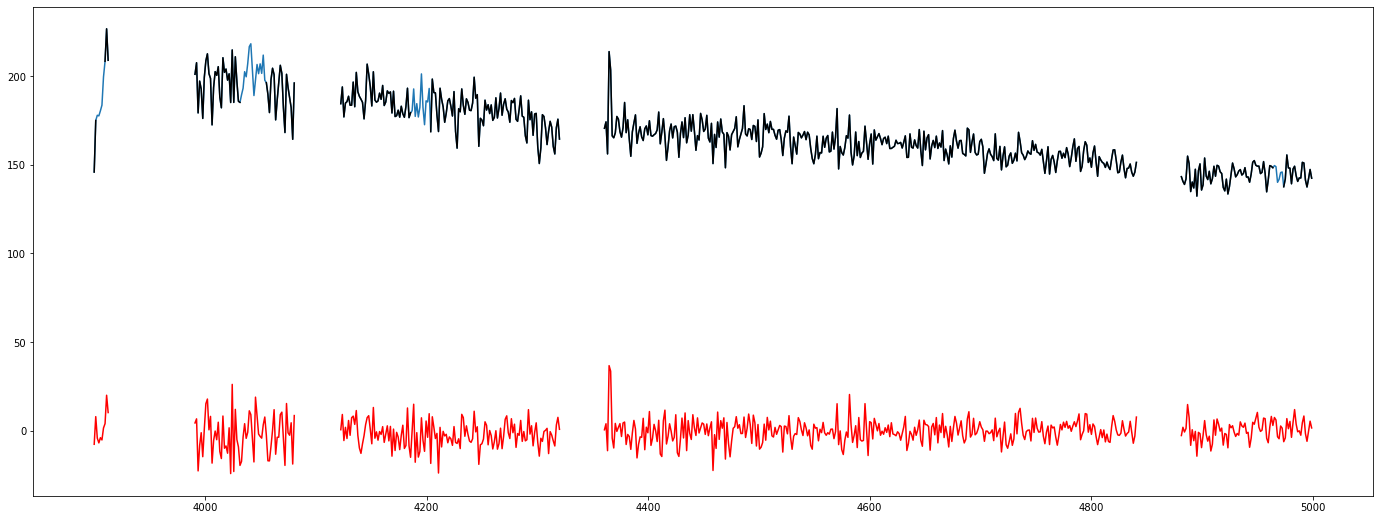

In [53]:
# find the file names of spectra corresponding to each parent; if there is only 1, ignore; 
# if >= 2, do median comparison to flag it for cosmic rays

for t in range(0,60):#len(parent_list)):
    
    #print("----------")
    #print(t)
    matching = list(filter(lambda x: parent_list[t] in x, file_list))
    
    if (len(matching) == 1):
        
        continue
    
    elif (len(matching) == 2):
        
        df_single_0 = pd.read_csv(matching[0], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_1 = pd.read_csv(matching[1], names=["wavel","flux","noise"], delim_whitespace=True)
        
        plot_result(df_single_0, df_single_1)
        
        
    elif (len(matching) == 3):
        
        df_single_0 = pd.read_csv(matching[0], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_1 = pd.read_csv(matching[1], names=["wavel","flux","noise"], delim_whitespace=True)
        df_single_2 = pd.read_csv(matching[2], names=["wavel","flux","noise"], delim_whitespace=True)
        
    elif (len(matching) > 3):
        
        continue

In [ ]:
# read in spectra for which continuum has been calculated

stem_s82_norm = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/rrlyrae_metallicity/realizations_output/norm/"